In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed data
df = pd.read_csv('preprocessed_data.csv')
print("Data loaded successfully!")
print("Shape:", df.shape)
print("Categories:", df['Korure_Category'].value_counts())

Data loaded successfully!
Shape: (1000, 21)
Categories: Korure_Category
Cardiovascular Health    475
Joint Health             346
Digestive Health         179
Name: count, dtype: int64


In [4]:
# Set visualization style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

# Basic data check
df.head()

,Patient_ID,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,...,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation,Korure_Category
0,P0001,56,Male,58.4,160,22.8,Obesity,Moderate,Moderate,3079,...,133,116.3,NaN,Peanuts,Mexican,3.1,96.6,3.1,Balanced,Digestive Health
1,P0002,69,Male,101.2,169,35.4,Diabetes,Mild,Moderate,3032,...,120,137.1,NaN,Peanuts,Chinese,4.5,63.2,0.6,Low_Carb,Joint Health
2,P0003,46,Female,63.5,173,21.2,Hypertension,Mild,Sedentary,1737,...,121,109.6,NaN,Peanuts,Chinese,3.8,57.5,4.6,Low_Sodium,Cardiovascular Health
3,P0004,32,Male,58.1,164,21.6,NaN,Mild,Moderate,2657,...,144,159.4,NaN,NaN,Mexican,4.3,54.5,0.4,Balanced,Digestive Health
4,P0005,60,Male,79.5,197,20.5,Diabetes,Moderate,Sedentary,3496,...,172,182.3,Low_Sugar,NaN,Italian,9.8,78.2,4.7,Low_Carb,Joint Health



1. TARGET VARIABLE DISTRIBUTION


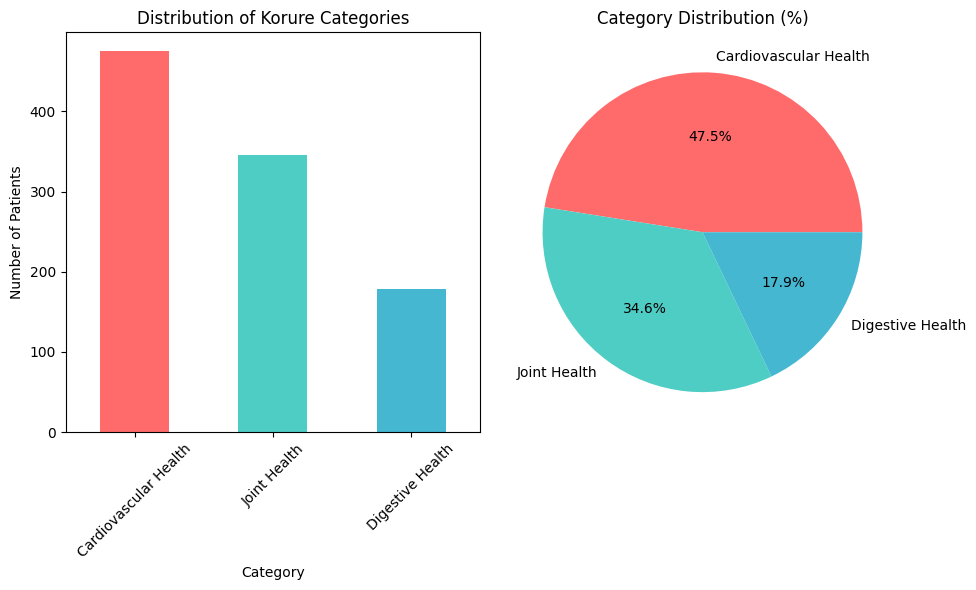

Target variable balance check:
- Cardiovascular Health: 475 patients (47.5%)
- Joint Health: 346 patients (34.6%)
- Digestive Health: 179 patients (17.9%)


In [5]:
# =============================================================================
# 1. TARGET VARIABLE ANALYSIS
# =============================================================================

print("\n1. TARGET VARIABLE DISTRIBUTION")
print("="*50)

# Visualize target variable distribution
plt.figure(figsize=(10, 6))
category_counts = df['Korure_Category'].value_counts()
plt.subplot(1, 2, 1)
category_counts.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Distribution of Korure Categories')
plt.xlabel('Category')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
        colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Category Distribution (%)')
plt.tight_layout()
plt.show()

print(f"Target variable balance check:")
for category, count in category_counts.items():
    percentage = (count/len(df)) * 100
    print(f"- {category}: {count} patients ({percentage:.1f}%)")




2. DEMOGRAPHIC PATTERNS BY CATEGORY


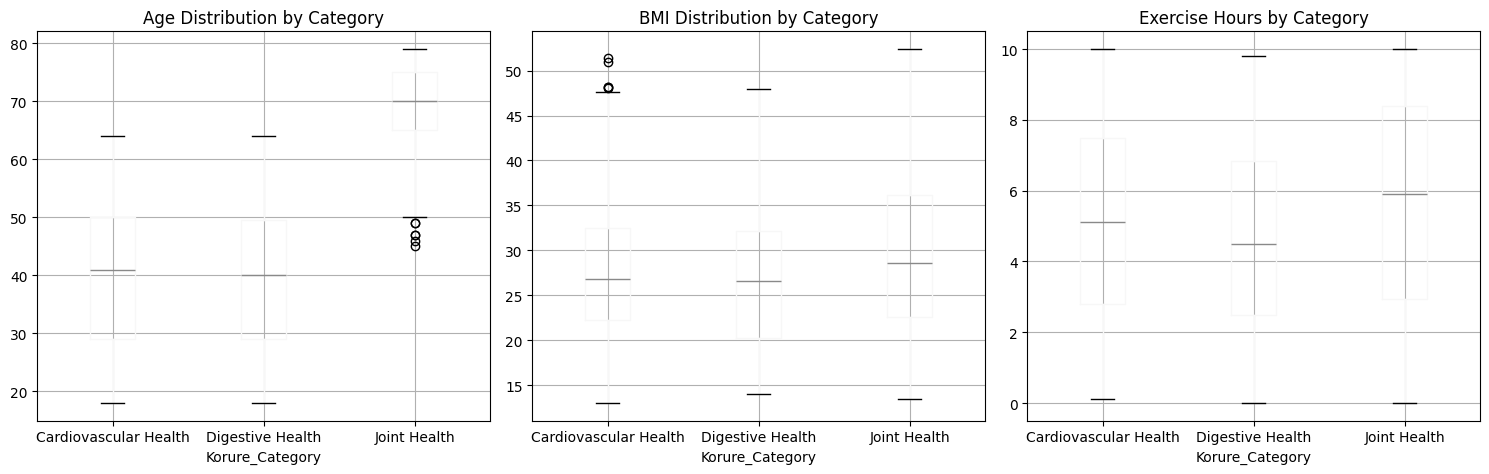


Age and BMI patterns by category:
                        Age                 BMI                   \
                       mean   std min max  mean  std   min   max   
Korure_Category                                                    
Cardiovascular Health  39.7  12.9  18  64  27.8  7.5  13.0  51.4   
Digestive Health       39.5  13.1  18  64  26.8  7.7  14.0  48.0   
Joint Health           69.1   7.9  45  79  29.5  8.7  13.5  52.4   

                      Weekly_Exercise_Hours       
                                       mean  std  
Korure_Category                                   
Cardiovascular Health                   5.1  2.8  
Digestive Health                        4.6  2.6  
Joint Health                            5.5  3.0  


In [6]:
# =============================================================================
# 2. DEMOGRAPHIC ANALYSIS BY CATEGORY
# =============================================================================

print("\n\n2. DEMOGRAPHIC PATTERNS BY CATEGORY")
print("="*50)

# Age distribution by category
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df.boxplot(column='Age', by='Korure_Category', ax=plt.gca())
plt.title('Age Distribution by Category')
plt.suptitle('')

plt.subplot(1, 3, 2)
df.boxplot(column='BMI', by='Korure_Category', ax=plt.gca())
plt.title('BMI Distribution by Category')
plt.suptitle('')

plt.subplot(1, 3, 3)
df.boxplot(column='Weekly_Exercise_Hours', by='Korure_Category', ax=plt.gca())
plt.title('Exercise Hours by Category')
plt.suptitle('')

plt.tight_layout()
plt.show()

# Statistical summary by category
print("\nAge and BMI patterns by category:")
demographic_summary = df.groupby('Korure_Category').agg({
    'Age': ['mean', 'std', 'min', 'max'],
    'BMI': ['mean', 'std', 'min', 'max'],
    'Weekly_Exercise_Hours': ['mean', 'std']
}).round(1)

print(demographic_summary)



3. HEALTH INDICATORS BY CATEGORY


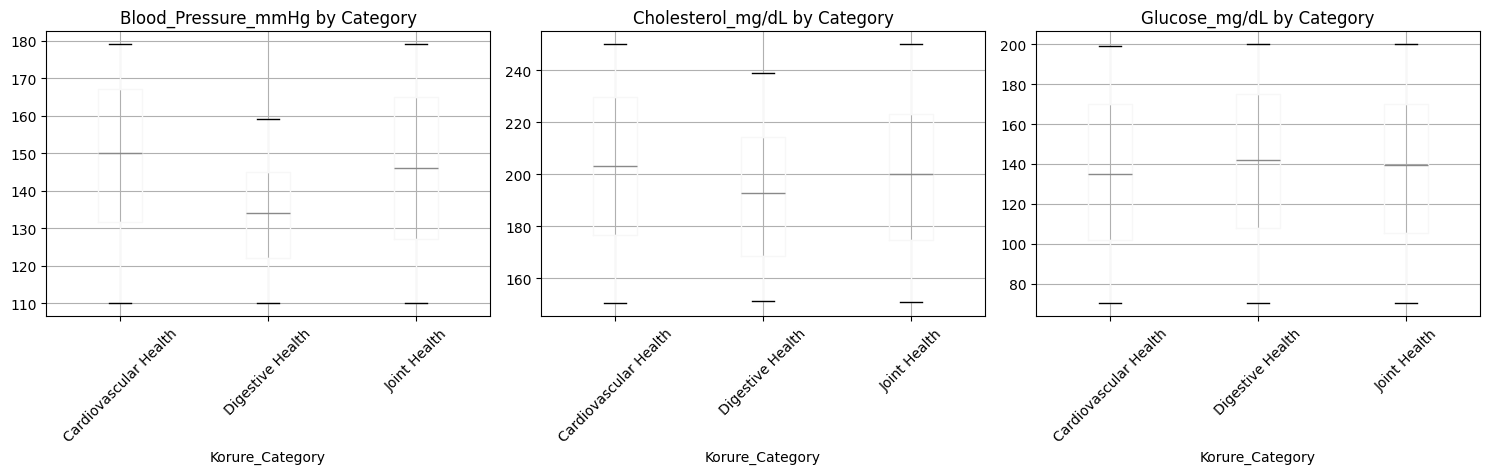


Health indicators summary:
                       Blood_Pressure_mmHg  Cholesterol_mg/dL  Glucose_mg/dL
Korure_Category                                                             
Cardiovascular Health                148.5              202.6          135.5
Digestive Health                     133.9              192.2          138.9
Joint Health                         145.9              199.7          137.7

Validating mapping logic:
Cardiovascular Health - Average BP: 148.5
Cardiovascular Health - Average Cholesterol: 202.6


In [7]:
# =============================================================================
# 3. HEALTH INDICATORS ANALYSIS
# =============================================================================

print("\n\n3. HEALTH INDICATORS BY CATEGORY")
print("="*50)

# Key health metrics by category
health_metrics = ['Blood_Pressure_mmHg', 'Cholesterol_mg/dL', 'Glucose_mg/dL']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(health_metrics, 1):
    plt.subplot(1, 3, i)
    df.boxplot(column=metric, by='Korure_Category', ax=plt.gca())
    plt.title(f'{metric} by Category')
    plt.suptitle('')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Health metrics summary
print("\nHealth indicators summary:")
health_summary = df.groupby('Korure_Category')[health_metrics].mean().round(1)
print(health_summary)

# Check if our mapping logic worked correctly
print("\nValidating mapping logic:")
print("Cardiovascular Health - Average BP:", health_summary.loc['Cardiovascular Health', 'Blood_Pressure_mmHg'])
print("Cardiovascular Health - Average Cholesterol:", health_summary.loc['Cardiovascular Health', 'Cholesterol_mg/dL'])




4. CORRELATION ANALYSIS


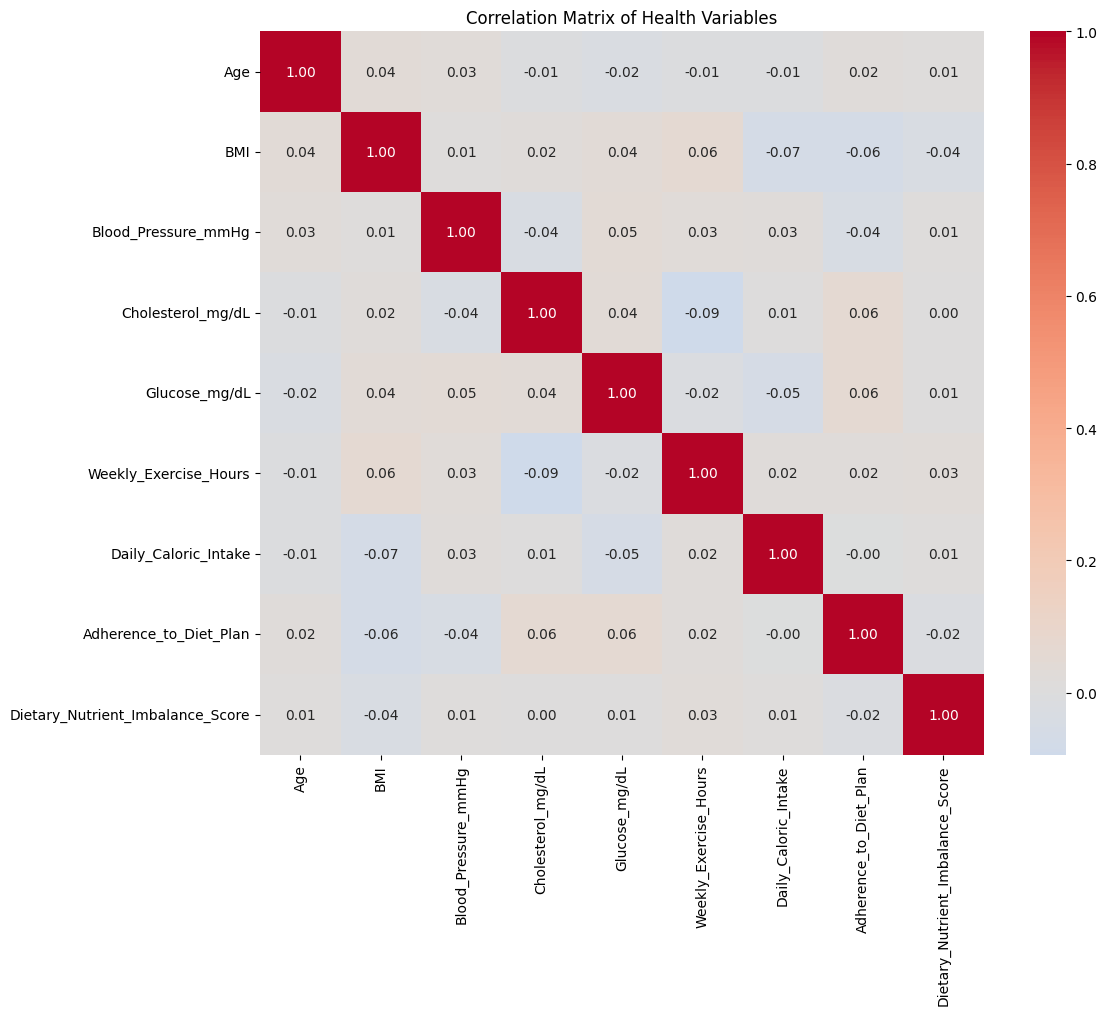

Strong correlations found:


In [8]:
# =============================================================================
# 4. CORRELATION ANALYSIS
# =============================================================================

print("\n\n4. CORRELATION ANALYSIS")
print("="*50)

# Select numeric columns for correlation
numeric_columns = ['Age', 'BMI', 'Blood_Pressure_mmHg', 'Cholesterol_mg/dL', 
                   'Glucose_mg/dL', 'Weekly_Exercise_Hours', 'Daily_Caloric_Intake',
                   'Adherence_to_Diet_Plan', 'Dietary_Nutrient_Imbalance_Score']

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix of Health Variables')
plt.tight_layout()
plt.show()

# Find strong correlations (>0.5 or <-0.5)
print("Strong correlations found:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            print(f"- {correlation_matrix.columns[i]} ↔ {correlation_matrix.columns[j]}: {corr_value:.3f}")



5. CATEGORICAL VARIABLES ANALYSIS


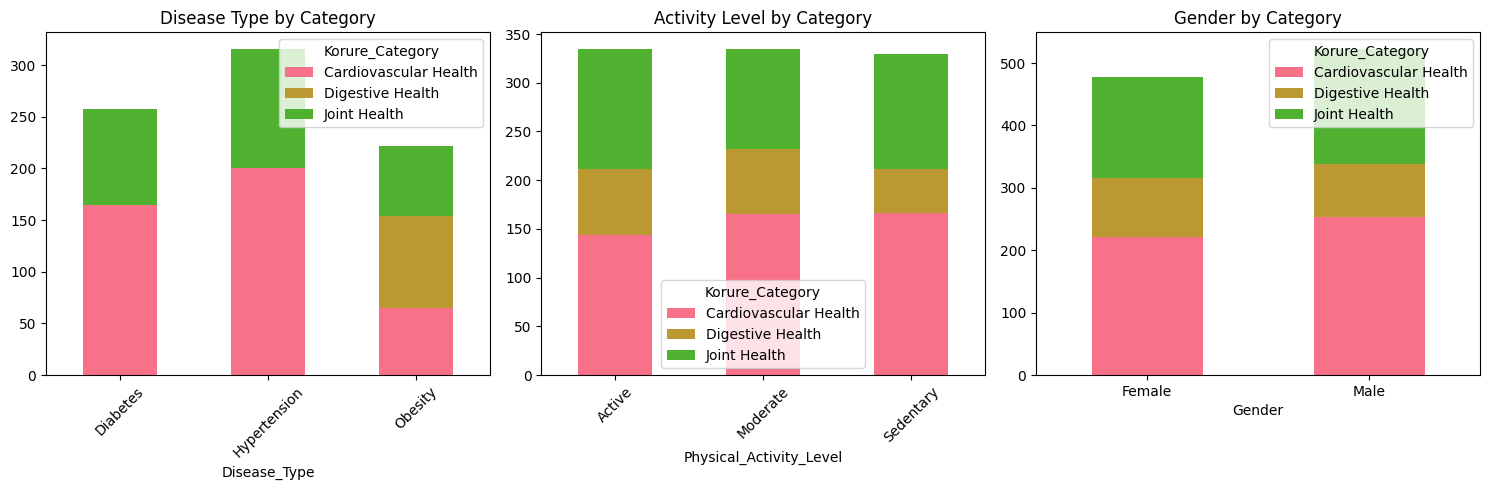


Disease distribution validation:
Korure_Category  Cardiovascular Health  Digestive Health  Joint Health
Disease_Type                                                          
Diabetes                           165                 0            93
Hypertension                       200                 0           116
Obesity                             65                89            68

Physical activity patterns:
Korure_Category          Cardiovascular Health  Digestive Health  Joint Health
Physical_Activity_Level                                                       
Active                                     144                67           124
Moderate                                   165                67           103
Sedentary                                  166                45           119


In [9]:
# =============================================================================
# 5. CATEGORICAL VARIABLES ANALYSIS
# =============================================================================

print("\n\n5. CATEGORICAL VARIABLES ANALYSIS")
print("="*50)

# Disease distribution by category
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
disease_category = pd.crosstab(df['Disease_Type'], df['Korure_Category'])
disease_category.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Disease Type by Category')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
activity_category = pd.crosstab(df['Physical_Activity_Level'], df['Korure_Category'])
activity_category.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Activity Level by Category')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
gender_category = pd.crosstab(df['Gender'], df['Korure_Category'])
gender_category.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Gender by Category')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Print categorical distributions
print("\nDisease distribution validation:")
print(disease_category)

print("\nPhysical activity patterns:")
print(activity_category)


In [10]:
# =============================================================================
# 6. FEATURE IMPORTANCE FOR SUPPLEMENT RECOMMENDATION
# =============================================================================

print("\n\n6. KEY INSIGHTS FOR SUPPLEMENT RECOMMENDATION")
print("="*50)

# Calculate mean differences between categories for key features
feature_insights = df.groupby('Korure_Category').agg({
    'Age': 'mean',
    'BMI': 'mean', 
    'Blood_Pressure_mmHg': 'mean',
    'Cholesterol_mg/dL': 'mean',
    'Weekly_Exercise_Hours': 'mean',
    'Dietary_Nutrient_Imbalance_Score': 'mean'
}).round(1)

print("Category characteristics:")
print(feature_insights)

# Validate our business rules
print("\nBusiness rule validation:")
joint_health = df[df['Korure_Category'] == 'Joint Health']
cardio_health = df[df['Korure_Category'] == 'Cardiovascular Health']

print(f"Joint Health - Patients over 65: {(joint_health['Age'] >= 65).sum()}")
print(f"Joint Health - Patients with BMI ≥35: {(joint_health['BMI'] >= 35).sum()}")
print(f"Cardiovascular - Patients with BP ≥160: {(cardio_health['Blood_Pressure_mmHg'] >= 160).sum()}")
print(f"Cardiovascular - Patients with Cholesterol ≥240: {(cardio_health['Cholesterol_mg/dL'] >= 240).sum()}")

print("\n" + "="*70)
print("EDA COMPLETE: Data patterns support our supplement recommendation logic")
print("Ready for machine learning model development")
print("="*70)



6. KEY INSIGHTS FOR SUPPLEMENT RECOMMENDATION
Category characteristics:
                        Age   BMI  Blood_Pressure_mmHg  Cholesterol_mg/dL  \
Korure_Category                                                             
Cardiovascular Health  39.7  27.8                148.5              202.6   
Digestive Health       39.5  26.8                133.9              192.2   
Joint Health           69.1  29.5                145.9              199.7   

                       Weekly_Exercise_Hours  Dietary_Nutrient_Imbalance_Score  
Korure_Category                                                                 
Cardiovascular Health                    5.1                               2.4  
Digestive Health                         4.6                               2.7  
Joint Health                             5.5                               2.5  

Business rule validation:
Joint Health - Patients over 65: 275
Joint Health - Patients with BMI ≥35: 104
Cardiovascular - Patients wit